<a href="https://colab.research.google.com/github/Gapinian/Network-Science-ICN-2024/blob/main/S1_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 1
## Graph theory and network science

In [109]:
import json # for file IO
import networkx as nx # for the graphs
from random import randint # pseudo-randomness
import matplotlib.pyplot as plt # for the drawings
from networkx.readwrite import json_graph # for output

In [110]:
G = nx.Graph() # simple undirected graph
n = 7 # graph order (= number of vertices)
m = 2 * n # graph size (= number of edges)

In [94]:
G.add_edge("Morata", "Suarez")
G.add_edge("Suarez", "Saul")
G.add_edge("Saul", "Morata")
G.add_edge("Saul", "Griezmann")
G.add_edge("Morata", "Griezmann")
G.add_edge("Suarez", "Griezmann")
G.add_node ("Ronaldo")
print(G)

Graph with 5 nodes and 6 edges


In [121]:
n=18
mmax = n*(n-1)/2 #max number of edges we can add when we have n nodes
m=mmax
assert m <= mmax #ensures that the code doesn't run when we have too many edges
G.add_nodes_from(range(1, n + 1)) # add vertices 1, 2, ..., n

while len(G.edges) < m: # add edges until the goal size is reached
    v = randint(1, n) # pick a vertex uniformly at random
    u = randint(1, n) # pick another
    if v != u: # if they differ, add it
        G.add_edge(v, u) # unit weight by default

A good example for the mmax formula is the regular football league season. When there are 18 teams, every team plays 17 home games per season. The total of home games payed during the season is 18*17. However, if we want to get the number of unique matchups (no matter home or away) we need to divide the total number of home games by 2 (for example, there is a Real-Atletico game and Atletico-Real game - 2 separate home-games but a unique matchup).

Why range is 1 to n+1? --> range is exclusive of the final number in the range, so if I was to set range from 0 to 5 if would draw me 5 nodes: 0, 1, 2, 3, 4, and EXCLUDE 5

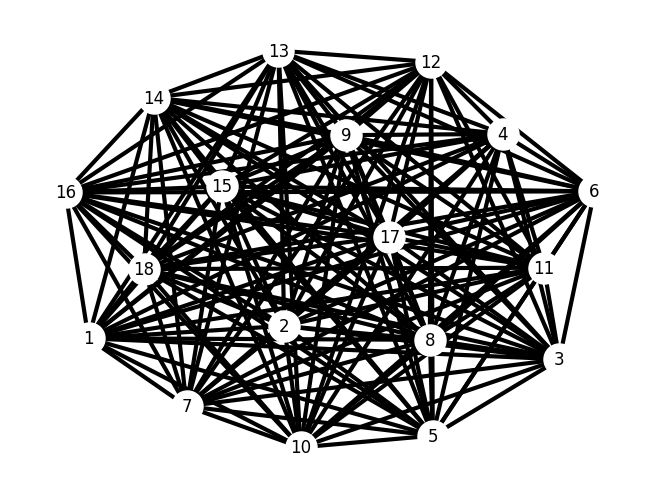

In [112]:
# set some options for the drawing
opt = { 'node_color': 'white',
        'node_size': 500,
        'width': 3,
        'with_labels': True }
coords = nx.spring_layout(G) # fix the positions
nx.draw(G, pos = coords, **opt) # create a drawing

In [ ]:
from sys import stdout
output = json_graph.node_link_data(G)
json.dump(output, stdout)

{"directed": false, "multigraph": false, "graph": {}, "nodes": [{"id": 1}, {"id": 2}, {"id": 3}, {"id": 4}, {"id": 5}, {"id": 6}, {"id": 7}], "links": [{"source": 1, "target": 2}, {"source": 1, "target": 4}, {"source": 1, "target": 7}, {"source": 1, "target": 5}, {"source": 1, "target": 3}, {"source": 2, "target": 4}, {"source": 2, "target": 7}, {"source": 3, "target": 5}, {"source": 4, "target": 6}, {"source": 4, "target": 5}, {"source": 4, "target": 7}, {"source": 5, "target": 6}, {"source": 5, "target": 7}, {"source": 6, "target": 7}]}

In [113]:
!pip install celluloid

In [114]:
from celluloid import Camera # creating animations

 Text(-0.9133111203624587, -0.44749054035245256, '1'),
 Text(-0.17543899350552092, -0.38534168838310967, '2'),
 Text(0.8622841671072387, -0.5518617620616436, '3'),
 Text(0.6489119834607315, 0.5721049505226345, '4'),
 Text(0.38480962586582135, -0.9329714374871535, '5'),
 Text(0.9946263182588885, 0.2857895548670183, '6'),
 Text(-0.5437227093220829, -0.7859464760107144, '7'),
 Text(0.3738689452166782, -0.45454652918800315, '8'),
 Text(0.05752344016694915, 0.5661297962186592, '9'),
 Text(-0.11367107802448709, -0.9912157975409618, '10'),
 Text(0.8043093376347353, -0.09513061364715164, '11'),
 Text(0.3788350555643955, 0.9311127984669574, '12'),
 Text(-0.19701538435659352, 0.9876395263771028, '13'),
 Text(-0.6679430627953512, 0.7528130884960758, '14'),
 Text(-0.41138510369791076, 0.3101531293941177, '15'),
 Text(-1.0, 0.2803091469617505, '16'),
 Text(0.22134634915797813, 0.060421885012337015, '17'),
 Text(-0.7040277703690032, -0.10196903164546431, '18')]

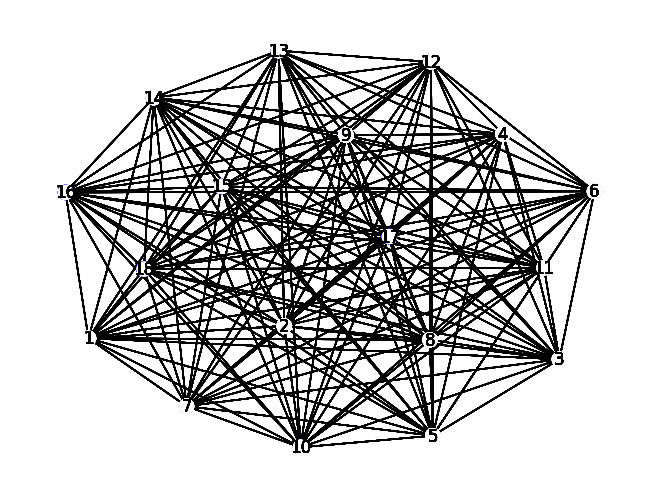

In [131]:
fig = plt.figure() # make a new figure to animate
cam = Camera(fig) # for storing the frames
opt = { 'node_size': 100,
        'width': 1,
        'with_labels': True }
palette = ['blue'] * n # make all blue
for v in range(n):
    palette[v] = 'pink' # highlight in yellow
    nx.draw(G, pos = coords, node_color = palette,  **opt)
    cam.snap() # take a snapshot
    palette[v] = 'white' # make the 'used' ones white
nx.draw(G, pos = coords, node_color = palette,  **opt)
cam.snap() # last frame all white

In [132]:
import IPython
animation = cam.animate(interval = 500) # milliseconds between frames
show = display(IPython.display.HTML(animation.to_html5_video()))

The process for the above code: (1) a figure is made, (2) camera feature to make the animation is imported from the external source, (3) new opt is set for the parameters of nodes, (4) the initial coloring scheme is set for all nodes, (5) the pattern of nodes changing their colors is set (5.1) the first node is colored in pink (5.2) pink is drawn with coordinates from initial graph and new opt (5.3) the snapshot of pink is made (5.4) the used node is colored white and the (5) repeats, (6) after the sequence was repeated with all nodes the new graph is drawn with all nodes being colored according to the last palette (white), (7) the snapshot of this new graph is taken

How to make (5) color nodes in random order?
Insert the following between (4) and (5); the first line below substitutes the first line of (5):

nodes = [v for v in range(n)] #sets v to be in the range n

from random import shuffle #shuffles the range n

shuffle(nodes)

Currently, (5) takes range(n) which is a consecutive range betwen 1 and n+1. With the code above it will take the new range which consists of a range(n) but shuffled

Range(n) above and in the code corresponds to colors (and colors start from 0 to 17, so there are a total of 18 positions)


Social networks

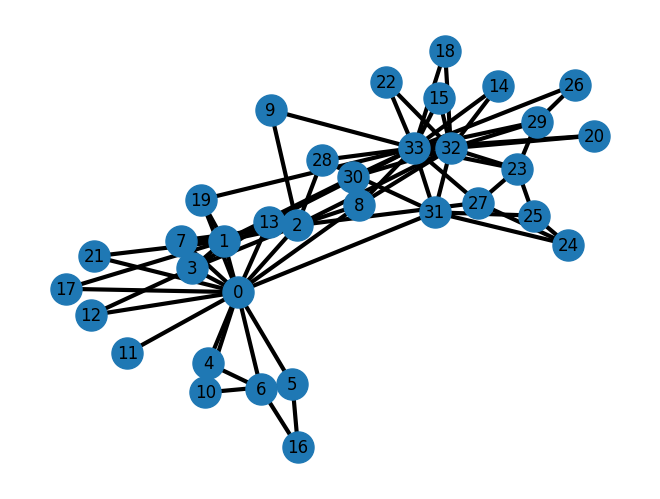

In [ ]:
G = nx.karate_club_graph()
coords = nx.spring_layout(G)
nx.draw(G, pos = coords, **opt)

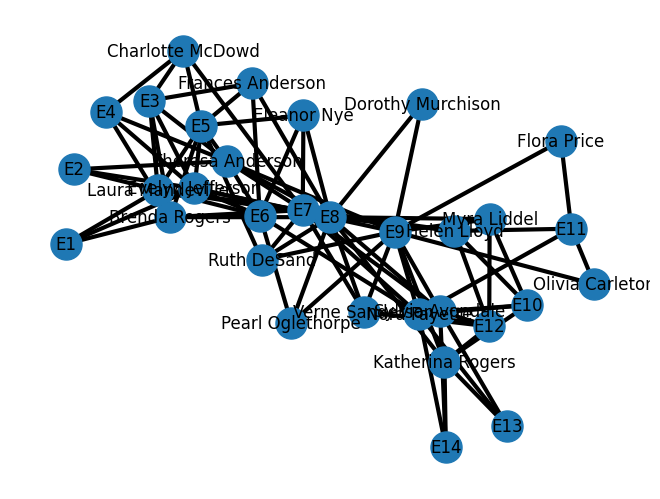

In [ ]:
G = nx.davis_southern_women_graph()
coords = nx.spring_layout(G)
nx.draw(G, pos = coords, **opt)

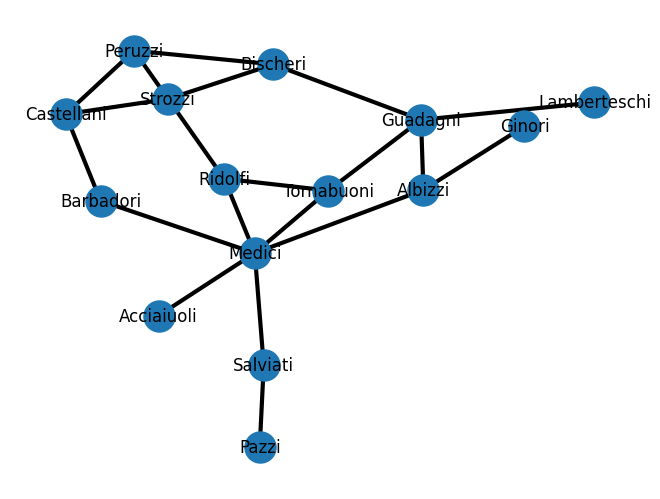

In [ ]:
G = nx.florentine_families_graph()
coords = nx.spring_layout(G)
nx.draw(G, pos = coords, **opt)

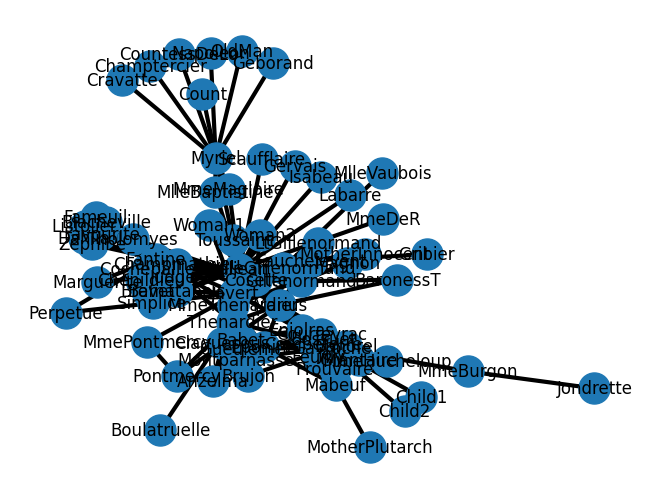

In [ ]:
G = nx.les_miserables_graph()
coords = nx.spring_layout(G)
nx.draw(G, pos = coords, **opt)